In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os
import sys
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load data

In [12]:
def load_data(path):

    arr = []
    
    
    input_list = os.listdir(path)
    y=[0]*len(input_list)
    i=0
    for file in sorted(input_list):
        s = plt.imread(path+file)
        s = s.flatten('F')
        arr.append(s)
        if "happy" in file:                                       
                y[i] = 1 
        i+=1        
    arr=np.matrix(arr)
    return arr,np.asarray(y)




# dimentionality reduction

In [13]:
train_X,train_Y = load_data('Data/emotion_classification/train/')
test_X,test_Y = load_data("Data/emotion_classification/test/")

train_X=StandardScaler().fit_transform(train_X)
test_X=StandardScaler().fit_transform(test_X)

pca = PCA(n_components = 12)                                                  
trainPCA= np.array(pca.fit_transform(train_X))
testPCA = np.array(pca.transform(test_X))
trainPCA=StandardScaler().fit_transform(trainPCA)
testPCA=StandardScaler().fit_transform(testPCA)


# important functions for modeling neuran network

In [7]:
def softmax(Z): 
        #for 2 classes sigmoid function is used as soft max
        return 1/(1+np.exp(-Z))
       
    
def cross_entropy(trueY,predY):
        
        loss = (1./20) * (-np.dot(trueY,np.log(predY + 10E-5).T) - np.dot(1-trueY, np.log(1-predY + 10E-5).T))    
        return loss
       
def Relu( Z):
    return np.maximum(0,Z)  

def deriv_output(trueY,predY):

        grad = - (np.divide(trueY, predY + 10E-5) - np.divide(1 - trueY, 1 - predY + 10E-5))              # dE/da = dE/dy*dy/de = deriv(cross_entropy)*deriv(softmax) [after further solving...]
        return grad

def dSigmoid( Z):
        s = 1/(1+np.exp(-Z))
        dZ = s * (1-s)
        return dZ


def dRelu(x):
    x[x<=0] = 0
    x[x>0] = 1
    return x

def forward(W1,W2,B1,B2,X):    
        A1 =np.dot(W1,X.T) + B1
        Z1 = Relu(A1)
        
        A2 = np.dot(W2,X.T) + B2
        Z2 = softmax(A2)
         
        
        return Z2
    
def model_training(train_X,train_Y,W1,W2,b1,b2): 
        
        losses = []

        for epoch in range(iterations):
             
            # feedforward step  
            A1 =np.dot(W1,train_X.T) + b1
            Z1 = Relu(A1)

            A2 = np.dot(W2,Z1) + b2
            Z2 = softmax(A2)
            pred_Y=Z2
          
            losses.append(cross_entropy(train_Y,pred_Y))             

            # backpropogation
            
            # derivative wrt output layer 
            dE_z2 = deriv_output(train_Y,pred_Y)  
            #derivative wrt to A2
            delta2=dE_z2 * dSigmoid(A2) 
            #derivative wrt to W2
            Grad_W2= 1./Z1.shape[1] * np.dot(delta2,Z1.T)
            #derivative wrt to b2
            Grad_b2 = 1./Z1.shape[1] * np.dot(delta2, np.ones([delta2.shape[1],1])) 
                            
            #derivative wrt to z1 
            dE_z1 = np.dot(W2.T,delta2)
            #derivative wrt to A1
            delta1 = dE_z1 * dRelu(A1) 
            #derivative wrt to W1
            Grad_W1 = 1./train_X.shape[0] * np.dot(delta1,train_X)
            #derivative wrt to b2
            Grad_b1 = 1./train_X.shape[0] * np.dot(delta1, np.ones([delta1.shape[1],1]))              

           
           
                                  
            W2-= alpha * Grad_W2            # weight updation
            W1 -= alpha * Grad_W1
            b1-=alpha*Grad_b1
            b2-= alpha*Grad_b2
            
                                              
                                    # plotting loss

        return W1,W2,b1,b2,losses
    

            
            
            
def accuracy(X,y,W1,W2,b1,b2):
     
        A1 =np.dot(W1,X.T) + b1
        Z1 = Relu(A1)

        A2 = np.dot(W2,Z1) + b2
        Z2 = softmax(A2)
        pred_Y=Z2
        y2=y.tolist()

        return sum(np.round(pred_Y)[0]==y2)/len(y2)*100            

# initialisation on neural network parameters

In [8]:

N = 20
D = 12
iterations = 20
def init(node,a,g):
    h1 = node
    alpha = a
    gamma=g
    np.random.seed(1)
    W1=np.random.randn(h1,D) / np.sqrt(D)
    W2=np.random.randn(1,h1) / np.sqrt(h1)
    b1=np.zeros((h1,1))
    b2=np.zeros((1,1))
    return W1,W2,b1,b2,h1,alpha,gamma
    


accuracy at alpha =0.01  70.0
accuracy at alpha =0.1  70.0
accuracy at alpha =0.5  70.0


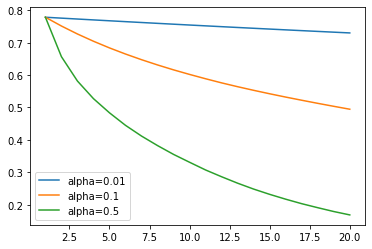

In [14]:

W1,W2,b1,b2,h1,alpha,gamma=init(10,0.01,0.0)
W_1,W_2,b_1,b_2,losses = model_training(trainPCA,train_Y,W1,W2,b1,b2)
acc1=accuracy(testPCA,test_Y,W_1,W_2,b_1,b_2)
plt.plot(range(1,iterations+1),losses)

W1,W2,b1,b2,h1,alpha,gamma=init(10,0.1,0.0)
W_1,W_2,b_1,b_2,losses = model_training(trainPCA,train_Y,W1,W2,b1,b2)
acc2=accuracy(testPCA,test_Y,W_1,W_2,b_1,b_2)
plt.plot(range(1,iterations+1),losses)

W1,W2,b1,b2,h1,alpha,gamma=init(10,0.5,0.0)
W_1,W_2,b_1,b_2,losses = model_training(trainPCA,train_Y,W1,W2,b1,b2)
acc3=accuracy(testPCA,test_Y,W_1,W_2,b_1,b_2)
plt.plot(range(1,iterations+1),losses)
plt.legend(["alpha=0.01","alpha=0.1","alpha=0.5"])

print("accuracy at alpha =0.01 ",acc1)
print("accuracy at alpha =0.1 ",acc2)
print("accuracy at alpha =0.5 ",acc3)

# Observation
at alpha=0.5 we are getting conversion at epoc 20 <br>
at alpha=0.1 we are no getting conversion under 20<br>
at alpha=0.01 loss curve is almost straight and it converges after 400 epoch<br>
hence alpha=0.5 is good learning rate 

# changing width of hidden layer

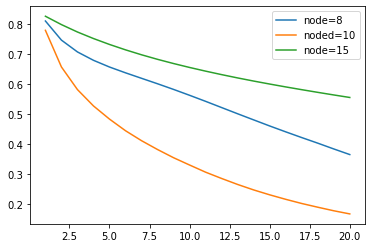

In [17]:
W1,W2,b1,b2,h1,alpha,gamma=init(8,0.5,0.0)
W_1,W_2,b_1,b_2,losses = model_training(trainPCA,train_Y,W1,W2,b1,b2)
acc1=accuracy(testPCA,test_Y,W_1,W_2,b_1,b_2)
plt.plot(range(1,iterations+1),losses)

W1,W2,b1,b2,h1,alpha,gamma=init(10,0.5,0.0)
W_1,W_2,b_1,b_2,losses = model_training(trainPCA,train_Y,W1,W2,b1,b2)
acc2=accuracy(testPCA,test_Y,W_1,W_2,b_1,b_2)
plt.plot(range(1,iterations+1),losses)

W1,W2,b1,b2,h1,alpha,gamma=init(15,0.1,0.0)
W_1,W_2,b_1,b_2,losses = model_training(trainPCA,train_Y,W1,W2,b1,b2)
acc3=accuracy(testPCA,test_Y,W_1,W_2,b_1,b_2)
plt.plot(range(1,iterations+1),losses)
plt.legend(["node=8","noded=10","node=15"])

In [18]:
print("accuracy at node=8 ",acc1)
print("accuracy at node=10 ",acc2)
print("accuracy at node=15 ",acc3)

accuracy at node=8  70.0
accuracy at node=10  70.0
accuracy at node=15  80.0


# observation
we can see at node=10.. loss function is converging faster at 20 epch<br>
whereas at node=15 its taking most time to converge<br>

but accuracy at node=15 is the highest